In [1]:
#seaborn样式--darkgrid,dark,whitegrid,white,ticks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

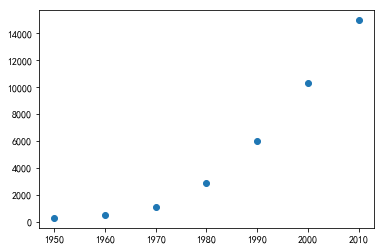

In [3]:
years=[1950,1960,1970,1980,1990,2000,2010]
gdp=[300.2,543.3,1075.9,2862.5,5979.6,10289.7,14958.3]
#绘图
plt.scatter(years,gdp)


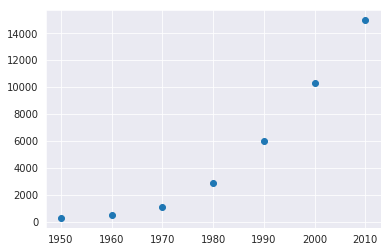

In [4]:
#通过设置set_style进行主题样式设置
sns.set_style("darkgrid")
plt.scatter(years,gdp)

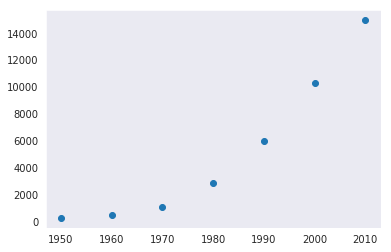

In [6]:
sns.set_style("dark")
plt.scatter(years,gdp)

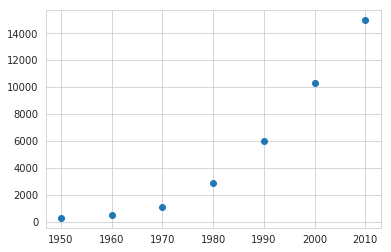

In [7]:
sns.set_style("whitegrid")
plt.scatter(years,gdp)

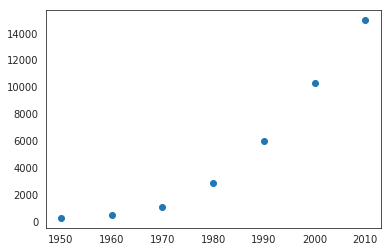

In [8]:
sns.set_style("white")
plt.scatter(years,gdp)

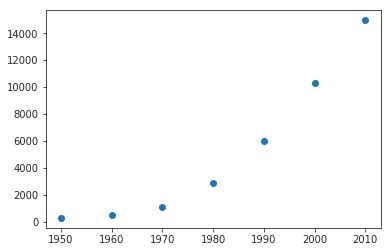

In [9]:
sns.set_style("ticks")
plt.scatter(years,gdp)

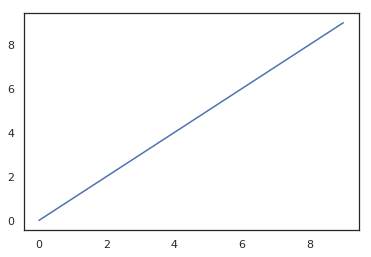

In [11]:
#style为主题，palette为调色板,color_codes为颜色代码
sns.set(style="white",palette="deep",color_codes=True)
plt.plot(np.arange(10))

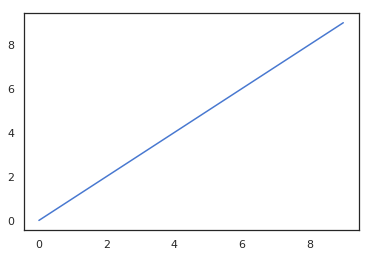

In [12]:
sns.set(style="white",palette="muted",color_codes=True)
plt.plot(np.arange(10))

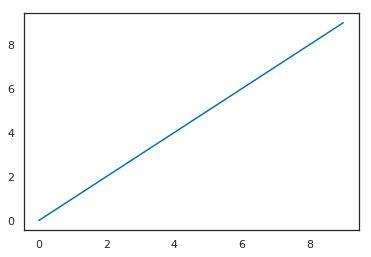

In [17]:
sns.set(style="white",palette="colorblind",color_codes=True)
plt.plot(np.arange(10))

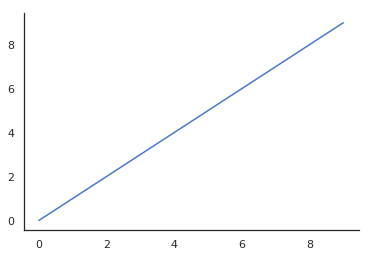

In [19]:
#坐标轴移除
sns.set(style="white",palette="muted",color_codes=True)
plt.plot(np.arange(10))
sns.despine()

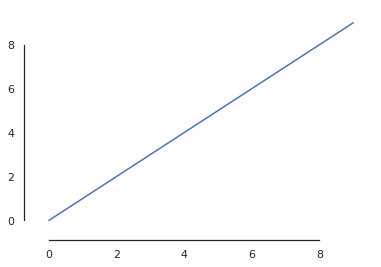

In [23]:
#使用offset参数可以偏移坐标轴，trim参数可以修建刻度
sns.set(style="white",palette="deep",color_codes="True")
plt.plot(np.arange(10))
sns.despine(offset=10,trim=True)

# 绘制全球地图

# 综合案例--泰坦尼克号生还者

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
titanic=pd.read_csv("/home/ysc/数据分析/data/第八讲/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
'''
survived:生存：活:1，死：0 pclass:船舱等级 name：乘客名字 sex：性别 age：年龄
sibsp：在船兄弟姐妹数/配偶数parch：在船父母数/子女数 ticket 船票编号
fare 船票价格 cabin 客舱号 embarked：登船港口
'''
#分析两个问题：泰坦尼勒乘客基本信息分布，乘客的信息与生还数据是否有关联

In [30]:
#数据清洗：查看是否有缺失值
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

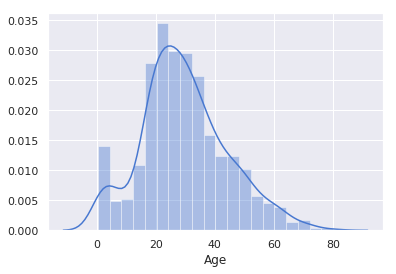

In [36]:
#对年龄进行缺失值处理，通过seaborn.distplot函数查看乘客年龄分布
sns.set(style="darkgrid",palette="muted",color_codes=True)
sns.distplot(titanic[titanic['Age'].notnull()]['Age'])

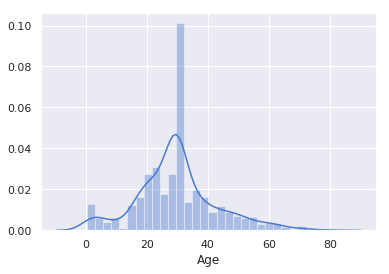

In [37]:
#年龄成正态分布，用年龄均值进行缺失值的填充
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())
sns.distplot(titanic['Age'])

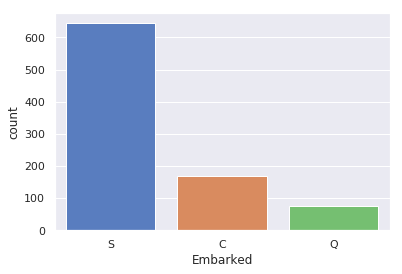

In [39]:
#使用countplot()对embarked进行可视化
sns.countplot(x="Embarked",data=titanic)

In [42]:
#Embarked缺失填充为s
titanic['Embarked']=titanic['Embarked'].fillna('S')
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [72]:
#Cabin缺失值太多，将其删除。多余字段删除
titanic= titanic.drop(['Ticket','SibSp','PassengerId','Cabin','Name','Parch'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


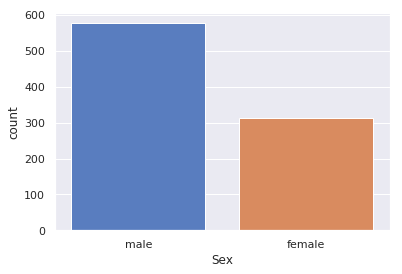

In [73]:
#可视化乘客的性别分布
sns.countplot(x='Sex',data=titanic)

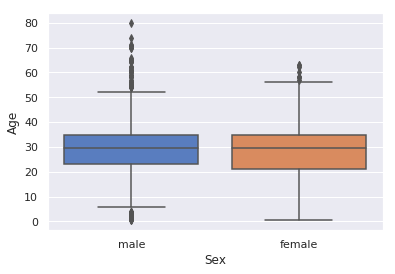

In [74]:
#结合性别绘制乘客年龄分布箱线图
sns.boxplot(x='Sex',y='Age',data=titanic)

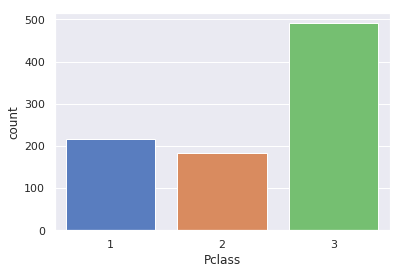

In [75]:
#对船舱等级进行计数
sns.countplot(x='Pclass',data=titanic)

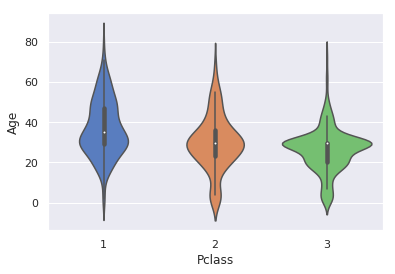

In [76]:
#结合船舱等级绘制乘客年龄分布琴状图
sns.violinplot(x='Pclass',y='Age',data=titanic)

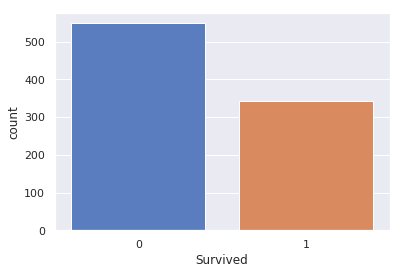

In [77]:
#分析生还乘客和别的字段关系--对生还可视化
sns.countplot(x='Survived',data=titanic)

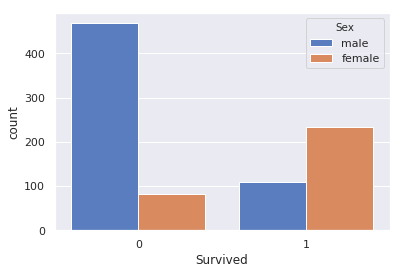

In [79]:
#生还与性别的关系
sns.countplot(x='Survived',hue='Sex',data=titanic)

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


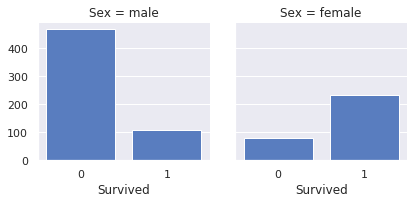

In [82]:
#利用网格计数进行性别与生还的关系
g=sns.FacetGrid(titanic,col='Sex')
g.map(sns.countplot,'Survived')

In [85]:
#对年龄进行分级看老人和小孩
def agelevel(age):
    if age <= 16:
        return 'child'
    elif age >=60:
        return 'aged'
    else:
        return 'midlife'
titanic['Age_level']=titanic['Age'].map(agelevel)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_level
0,0,3,male,22.0,7.2500,S,midlife
1,1,1,female,38.0,71.2833,C,midlife
2,1,3,female,26.0,7.9250,S,midlife
3,1,1,female,35.0,53.1000,S,midlife
4,0,3,male,35.0,8.0500,S,midlife


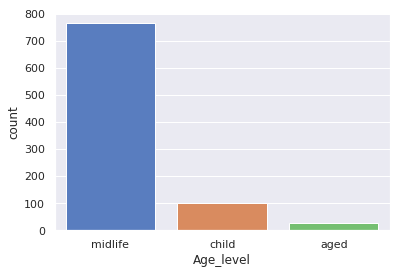

In [87]:
#对年龄级别进行可视化
sns.countplot(x='Age_level',data=titanic)

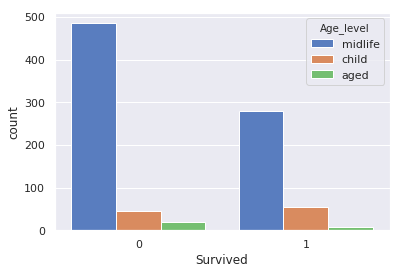

In [88]:
sns.countplot(x='Survived',hue='Age_level',data=titanic)

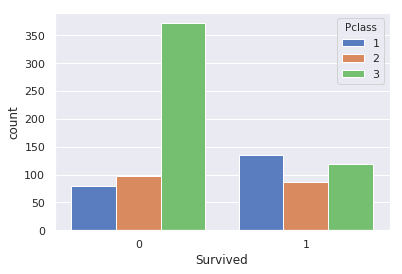

In [90]:
sns.countplot(x='Survived',hue='Pclass',data=titanic)